# Challenge

## WADE El Hadji Malick

In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import math
from random import *


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.metrics import auc, log_loss, recall_score, precision_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score,roc_curve

import sklearn.metrics

import warnings

# On ignore les avertissements des classes de modéles
warnings.filterwarnings("ignore", category=DeprecationWarning)

# On sauvegarde nos modéles finales
from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement et Data preprocessing

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print("Données Train:")
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])

print("----")

print("Données Test:")
print ("Lignes: " ,Xtestchallenge.shape[0])
print ("Colonnes: " ,Xtestchallenge.shape[1])

Données Train:
Lignes:  1000
Colonnes:  500
----
Données Test:
Lignes:  1000
Colonnes:  500


In [4]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [5]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1001,482,538,473,485,576,479,489,477,473,479,495,527,439,485,465,523,477,466,502,478,479,466,484,481,492,465,478,481,469,488,472,551,521,536,472,510,499,513,475,476,476,476,507,493,523,446,492,513,498,452,601,482,476,478,524,473,461,501,588,466,487,487,491,483,453,544,504,477,484,477,520,494,492,475,476,522,474,471,461,487,511,524,409,467,510,517,474,478,483,561,476,460,457,527,483,543,484,449,484,498,466,478,482,477,480,462,473,558,535,485,490,491,482,473,530,493,463,489,488,473,477,484,486,505,437,497,501,499,476,435,476,490,473,475,427,513,505,475,480,476,496,527,489,479,464,495,477,510,485,512,430,489,465,432,476,498,503,448,481,469,476,480,488,477,485,492,475,482,475,545,478,554,422,479,475,444,501,479,486,497,508,513,478,487,499,474,499,493,489,471,486,494,486,444,525,478,471,484,476,484,519,498,527,555,498,474,473,481,467,478,511,467,470,485,481,501,549,473,532,484,447,539,510,535,522,463,492,477,477,493,490,481,471,485,445,519,502,473,469,489,485,562,458,464,540,482,463,472,475,529,508,499,482,503,477,438,487,423,491,512,485,479,485,443,485,502,447,517,551,504,495,517,510,512,469,499,476,522,468,419,476,439,460,475,537,471,502,544,483,469,478,537,541,474,489,532,507,489,484,483,480,491,475,463,512,477,463,487,510,459,491,478,559,493,462,462,470,471,449,466,483,494,489,489,484,483,465,489,482,538,532,470,476,491,571,487,422,546,526,472,542,469,471,554,507,476,488,563,496,484,477,493,452,494,488,455,495,478,491,514,446,496,495,506,475,461,504,486,482,523,484,462,507,480,506,497,476,522,518,446,475,452,498,479,503,461,537,477,477,440,466,472,478,508,481,507,489,487,519,474,47

In [6]:
# On regroupe les données
Xchallenge = pd.concat([Xtrainchallenge,Xtestchallenge])
Xchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [7]:
print("Données Total:")
print ("Lignes: " ,Xchallenge.shape[0])
print ("Colonnes: " ,Xchallenge.shape[1])

Données Total:
Lignes:  2000
Colonnes:  500


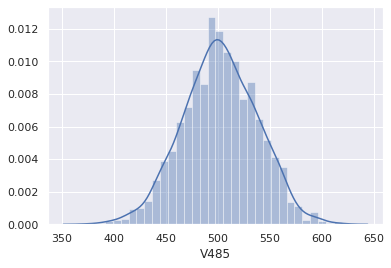

In [8]:
import scipy.stats as stats
import pylab 

col1 =  choice(Xchallenge.columns) # on choisit une variable au hasard

sns.set(style="darkgrid")
sns.distplot(Xchallenge[col1])

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([376, 390, 392, ..., 608, 614, 619])),
 (35.66114143698799, 501.877, 0.9996425871094766))

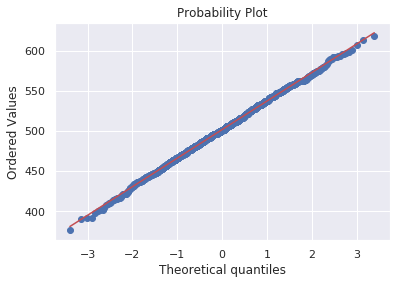

In [9]:
stats.probplot(Xchallenge[col1], dist="norm", plot=pylab)

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(Xchallenge[col1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('la variable semble être Gaussien (on ne rejette pas H0)')
else:
    print('La variable ne semble pas être Gaussien (On rejette H0)')

Statistics=0.999, p=0.590
la variable semble être Gaussien (on ne rejette pas H0)


In [11]:
nombre_de_variable_gaussienne = 0

for col in list(Xchallenge.columns):
    stat, p = shapiro(Xchallenge[col])
    
    if p < 0.05:
        nombre_de_variable_gaussienne += 1
        
print("Nombre de variables non gaussiennes par le test de Shapiro: ",nombre_de_variable_gaussienne)

Nombre de variables non gaussiennes par le test de Shapiro:  210


## 2. Features selection 

#### a. VarianceThreshold 

In [13]:
variance = 1

Col = Xchallenge.var() > variance
Col = [i for i in Col.index if Col[i]==True]

Col = list(set(Col))
Col.sort()

print("Il y'a",Xchallenge.shape[1] - len(Col),"variables avec une variance inférieure à 1")
print("Nous décidons de les écarter car elles n'apportent aucune information(variance)")

Il y'a 6 variables avec une variance inférieure à 1
Nous décidons de les écarter car elles n'apportent aucune information(variance)


In [14]:
# on supprime les variables avec une faible variance en gardant un jeu de données initiales

Xtrainchallenge_init = Xtrainchallenge.copy()
Xtestchallenge_init = Xtestchallenge.copy()

Xtrainchallenge = Xtrainchallenge[Col] 
Xtestchallenge = Xtestchallenge[Col] 

#### b. RFECV

In [15]:
from sklearn.feature_selection import RFECV

In [16]:
X = Xtrainchallenge
y = Ytrainchallenge

##### Séléction de variables avec Decision Tree 

In [17]:
sklearn.metrics.SCORERS.keys() # les métriques de sklearn

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [18]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=5, scoring='roc_auc', n_jobs=-1, verbose=10)
rfecv.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
F

Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
F

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 fe

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
      verbose=10)

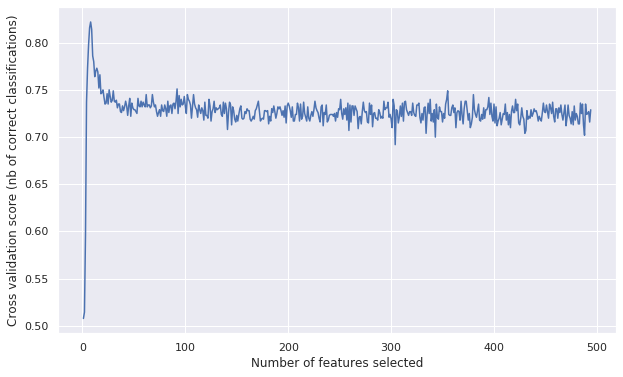

In [19]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [20]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 8
Selected features: ['V106', 'V154', 'V29', 'V319', 'V339', 'V379', 'V443', 'V476']


In [21]:
DT_Selected_features = list(X.columns[rfecv.support_]) # les 7 variables selectionnées

X = X[DT_Selected_features]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314)

In [24]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth":np.arange(5, 13, dtype=int),
    "min_samples_split": [2, 0.001, 0.005, 0.01, 0.02],
    "min_samples_leaf": [0.001, 0.0025, 0.005, 0.01, 0.02],
    "min_impurity_decrease" : [0.001,0.0015,0.002,0.005,0.01],
    "max_features": [0.5, 0.75, 1., "sqrt"]
}

clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, scoring ="roc_auc", cv=5, n_jobs=-1,verbose=8)

clf_DT.fit(X_train, y_train)

Fitting 5 folds for each of 8000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1042 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1826 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 2770 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 3842 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 5074 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 6434 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 7954 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 9602 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 11410 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 13346 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 15442 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 17666 tasks   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12]),
      

In [25]:
print("Train: ",clf_DT.score(X_train, y_train))
print("Test: ",clf_DT.score(X_test, y_test))
print("\n")
print(clf_DT.best_params_)

Train:  0.9555007147479891
Test:  0.8328317110655739


{'criterion': 'gini', 'max_depth': 8, 'max_features': 1.0, 'min_impurity_decrease': 0.002, 'min_samples_leaf': 0.0025, 'min_samples_split': 0.01}


In [26]:
y_DT = clf_DT.predict(X_test)
print(classification_report(y_test, y_DT))

              precision    recall  f1-score   support

          -1       0.87      0.75      0.81       128
           1       0.77      0.89      0.82       122

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



In [27]:
print(confusion_matrix(y_test, y_DT))

[[ 96  32]
 [ 14 108]]


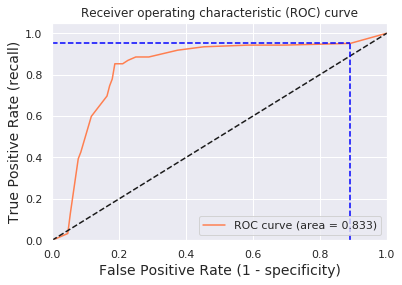

Using a threshold of 0.033 guarantees a sensitivity of 0.951 and a specificity of 0.109, i.e. a false positive rate of 89.06%.


In [28]:
y_pred = y_DT
y_pred_proba = clf_DT.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# print('Train/Test split results:')
# print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# print(logreg.__class__.__name__+"log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### Application à XGBOOST 

https://xgboost.readthedocs.io/en/latest/parameter.html

In [29]:
parameters = {
    "eta" : np.arange(0.01, 0.35, 0.05),
    "lambda" : np.arange(1, 2, 0.25),
    "subsample" : np.arange(0.5, 1, 0.1),
    "colsample_bytree": np.arange(0.5, 1.1, 0.25),
    "learning_rate":  [0.001, 0.005, 0.01, 0.05, 0.1],
    "max_depth":np.arange(5, 11, dtype=int),
    "max_features":[0.5, 1.0],
    "n_estimators" : [200, 400, 500],
    "eval_metric" : ["error"], 
    'objective': ['binary:logistic']
    }

In [30]:
clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

eval_set = [(X_test, y_test)]
                    
clf_XGB.fit(X_train, y_train, early_stopping_rounds=25, eval_metric="error", eval_set=eval_set, verbose=True)

Fitting 5 folds for each of 75600 candidates, totalling 378000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0834s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 564 tas

[Parallel(n_jobs=-1)]: Done 34764 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 35296 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 35828 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 36368 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 36908 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 37456 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 38004 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 38560 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 39116 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 39680 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 40244 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 40816 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 41388 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 41968 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 42548 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 43136 tasks 

[Parallel(n_jobs=-1)]: Done 99406 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done 99924 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 100446 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 100968 tasks      | elapsed: 39.9min
[Parallel(n_jobs=-1)]: Done 101494 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 102020 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 102550 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 103080 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 103614 tasks      | elapsed: 41.2min
[Parallel(n_jobs=-1)]: Done 104148 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 104686 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 105224 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 105766 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 106308 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 106854 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done

[Parallel(n_jobs=-1)]: Done 181320 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 182094 tasks      | elapsed: 85.0min
[Parallel(n_jobs=-1)]: Done 182868 tasks      | elapsed: 85.5min
[Parallel(n_jobs=-1)]: Done 183646 tasks      | elapsed: 86.0min
[Parallel(n_jobs=-1)]: Done 184424 tasks      | elapsed: 86.6min
[Parallel(n_jobs=-1)]: Done 185206 tasks      | elapsed: 87.1min
[Parallel(n_jobs=-1)]: Done 185988 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 186774 tasks      | elapsed: 88.0min
[Parallel(n_jobs=-1)]: Done 187560 tasks      | elapsed: 88.6min
[Parallel(n_jobs=-1)]: Done 188350 tasks      | elapsed: 89.1min
[Parallel(n_jobs=-1)]: Done 189140 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done 189934 tasks      | elapsed: 90.2min
[Parallel(n_jobs=-1)]: Done 190728 tasks      | elapsed: 90.7min
[Parallel(n_jobs=-1)]: Done 191526 tasks      | elapsed: 91.2min
[Parallel(n_jobs=-1)]: Done 192324 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 293446 tasks      | elapsed: 162.6min
[Parallel(n_jobs=-1)]: Done 294468 tasks      | elapsed: 163.2min
[Parallel(n_jobs=-1)]: Done 295494 tasks      | elapsed: 164.0min
[Parallel(n_jobs=-1)]: Done 296520 tasks      | elapsed: 164.9min
[Parallel(n_jobs=-1)]: Done 297550 tasks      | elapsed: 165.7min
[Parallel(n_jobs=-1)]: Done 298580 tasks      | elapsed: 166.3min
[Parallel(n_jobs=-1)]: Done 299614 tasks      | elapsed: 167.0min
[Parallel(n_jobs=-1)]: Done 300648 tasks      | elapsed: 168.0min
[Parallel(n_jobs=-1)]: Done 301686 tasks      | elapsed: 168.8min
[Parallel(n_jobs=-1)]: Done 302724 tasks      | elapsed: 169.4min
[Parallel(n_jobs=-1)]: Done 303766 tasks      | elapsed: 170.1min
[Parallel(n_jobs=-1)]: Done 304808 tasks      | elapsed: 170.9min
[Parallel(n_jobs=-1)]: Done 305854 tasks      | elapsed: 171.9min
[Parallel(n_jobs=-1)]: Done 306900 tasks      | elapsed: 172.6min
[Parallel(n_jobs=-1)]: Done 307950 tasks      | elapsed: 173.2min
[Parallel(

[0]	validation_0-error:0.284
Will train until validation_0-error hasn't improved in 25 rounds.
[1]	validation_0-error:0.208
[2]	validation_0-error:0.184
[3]	validation_0-error:0.208
[4]	validation_0-error:0.208
[5]	validation_0-error:0.216
[6]	validation_0-error:0.208
[7]	validation_0-error:0.204
[8]	validation_0-error:0.208
[9]	validation_0-error:0.176
[10]	validation_0-error:0.18
[11]	validation_0-error:0.188
[12]	validation_0-error:0.192
[13]	validation_0-error:0.196
[14]	validation_0-error:0.188
[15]	validation_0-error:0.184
[16]	validation_0-error:0.184
[17]	validation_0-error:0.184
[18]	validation_0-error:0.18
[19]	validation_0-error:0.172
[20]	validation_0-error:0.184
[21]	validation_0-error:0.192
[22]	validation_0-error:0.188
[23]	validation_0-error:0.188
[24]	validation_0-error:0.18
[25]	validation_0-error:0.188
[26]	validation_0-error:0.176
[27]	validation_0-error:0.192
[28]	validation_0-error:0.192
[29]	validation_0-error:0.184
[30]	validation_0-error:0.172
[31]	validation_0

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[54]	validation_0-error:0.14
[55]	validation_0-error:0.14
[56]	validation_0-error:0.144
[57]	validation_0-error:0.14
[58]	validation_0-error:0.14
[59]	validation_0-error:0.144
[60]	validation_0-error:0.144
[61]	validation_0-error:0.148
[62]	validation_0-error:0.148
[63]	validation_0-error:0.144
[64]	validation_0-error:0.14
[65]	validation_0-error:0.148
[66]	validation_0-error:0.152
[67]	validation_0-error:0.152
[68]	validation_0-error:0.148
[69]	validation_0-error:0.156
[70]	validation_0-error:0.152
[71]	validation_0-error:0.152
[72]	validation_0-error:0.156
[73]	validation_0-error:0.152
[74]	validation_0-error:0.152
[75]	validation_0-error:0.156
[76]	validation_0-error:0.156
[77]	validation_0-error:0.16
[78]	validation_0-error:0.152
[79]	validation_0-error:0.152
Stopping. Best iteration:
[54]	validation_0-error:0.14



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                         'eta': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31]),
                         'eval_metric': ['error'],
                         'lambda': array([1.  , 1.25, 1.5 , 1.75]),
                         'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10]),
       

In [31]:
print("Train: ",clf_XGB.score(X_train, y_train))
print("Test: ",clf_XGB.score(X_test, y_test))
print("\n")
print(clf_XGB.best_params_)

Train:  0.9773333333333334
Test:  0.86


{'colsample_bytree': 0.75, 'eta': 0.01, 'eval_metric': 'error', 'lambda': 1.0, 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.6}


In [32]:
y_XGB = clf_XGB.predict(X_test)
print(classification_report(y_test, y_XGB))

              precision    recall  f1-score   support

          -1       0.85      0.88      0.86       128
           1       0.87      0.84      0.85       122

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



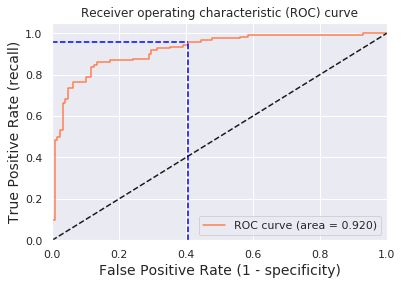

Using a threshold of 0.315 guarantees a sensitivity of 0.959 and a specificity of 0.594, i.e. a false positive rate of 40.62%.


In [33]:
y_pred = y_XGB
y_pred_proba = clf_XGB.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# print('Train/Test split results:')
# print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [44]:
# save the model to disk
filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_3'
joblib.dump(clf_XGB, filename)

['/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_3']

In [57]:
y_XGB = clf_XGB.predict(Xtestchallenge[DT_Selected_features])
np.savetxt('/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_3.txt', np.transpose(y_XGB),fmt='% 0d')

In [65]:
meilleur_model = clf_XGB.best_estimator_

In [66]:
meilleur_model.fit(Xtrainchallenge[DT_Selected_features], Ytrainchallenge, early_stopping_rounds=25, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.152
Will train until validation_0-error hasn't improved in 25 rounds.
[1]	validation_0-error:0.112
[2]	validation_0-error:0.088
[3]	validation_0-error:0.088
[4]	validation_0-error:0.068
[5]	validation_0-error:0.06
[6]	validation_0-error:0.072
[7]	validation_0-error:0.056
[8]	validation_0-error:0.044
[9]	validation_0-error:0.044
[10]	validation_0-error:0.04
[11]	validation_0-error:0.044
[12]	validation_0-error:0.036
[13]	validation_0-error:0.04
[14]	validation_0-error:0.032
[15]	validation_0-error:0.032
[16]	validation_0-error:0.032
[17]	validation_0-error:0.032
[18]	validation_0-error:0.036
[19]	validation_0-error:0.032
[20]	validation_0-error:0.032
[21]	validation_0-error:0.02
[22]	validation_0-error:0.016
[23]	validation_0-error:0.02
[24]	validation_0-error:0.024
[25]	validation_0-error:0.02
[26]	validation_0-error:0.016
[27]	validation_0-error:0.02
[28]	validation_0-error:0.016
[29]	validation_0-error:0.016
[30]	validation_0-error:0.02
[31]	validation_0-erro

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[41]	validation_0-error:0.008
[42]	validation_0-error:0.012
[43]	validation_0-error:0.012
[44]	validation_0-error:0.012
[45]	validation_0-error:0.008
[46]	validation_0-error:0.012
[47]	validation_0-error:0.012
[48]	validation_0-error:0.012
[49]	validation_0-error:0.012
[50]	validation_0-error:0.008
[51]	validation_0-error:0.008
[52]	validation_0-error:0.008
[53]	validation_0-error:0.008
[54]	validation_0-error:0.008
[55]	validation_0-error:0.008
[56]	validation_0-error:0.008
[57]	validation_0-error:0.008
[58]	validation_0-error:0.008
[59]	validation_0-error:0.008
[60]	validation_0-error:0.008
[61]	validation_0-error:0.008
[62]	validation_0-error:0.008
Stopping. Best iteration:
[37]	validation_0-error:0.008



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, eta=0.01,
              eval_metric='error', gamma=0, lambda=1.0, learning_rate=0.05,
              max_delta_step=0, max_depth=10, max_features=0.5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [67]:
y_meilleur = meilleur_model.predict(Xtestchallenge[DT_Selected_features])
np.savetxt('/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_31.txt', np.transpose(y_meilleur),fmt='% 0d')

In [71]:
print(classification_report(Ytrainchallenge,meilleur_model.predict(Xtrainchallenge[DT_Selected_features])))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       499
           1       0.97      0.97      0.97       501

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [73]:
confusion_matrix(Ytrainchallenge,meilleur_model.predict(Xtrainchallenge[DT_Selected_features]))

array([[485,  14],
       [ 13, 488]])

## 3. Data Analyse

In [34]:
print(DT_Selected_features)

['V106', 'V154', 'V29', 'V319', 'V339', 'V379', 'V443', 'V476']


In [37]:
X.head()

,V106,V154,V29,V319,V339,V379,V443,V476
1,181,575,459,414,628,419,568,401
2,431,404,475,469,528,526,463,549
3,593,585,491,506,431,464,503,454
4,698,591,472,458,377,553,447,602
5,451,448,472,462,509,424,536,560


#### a. Pairplot

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


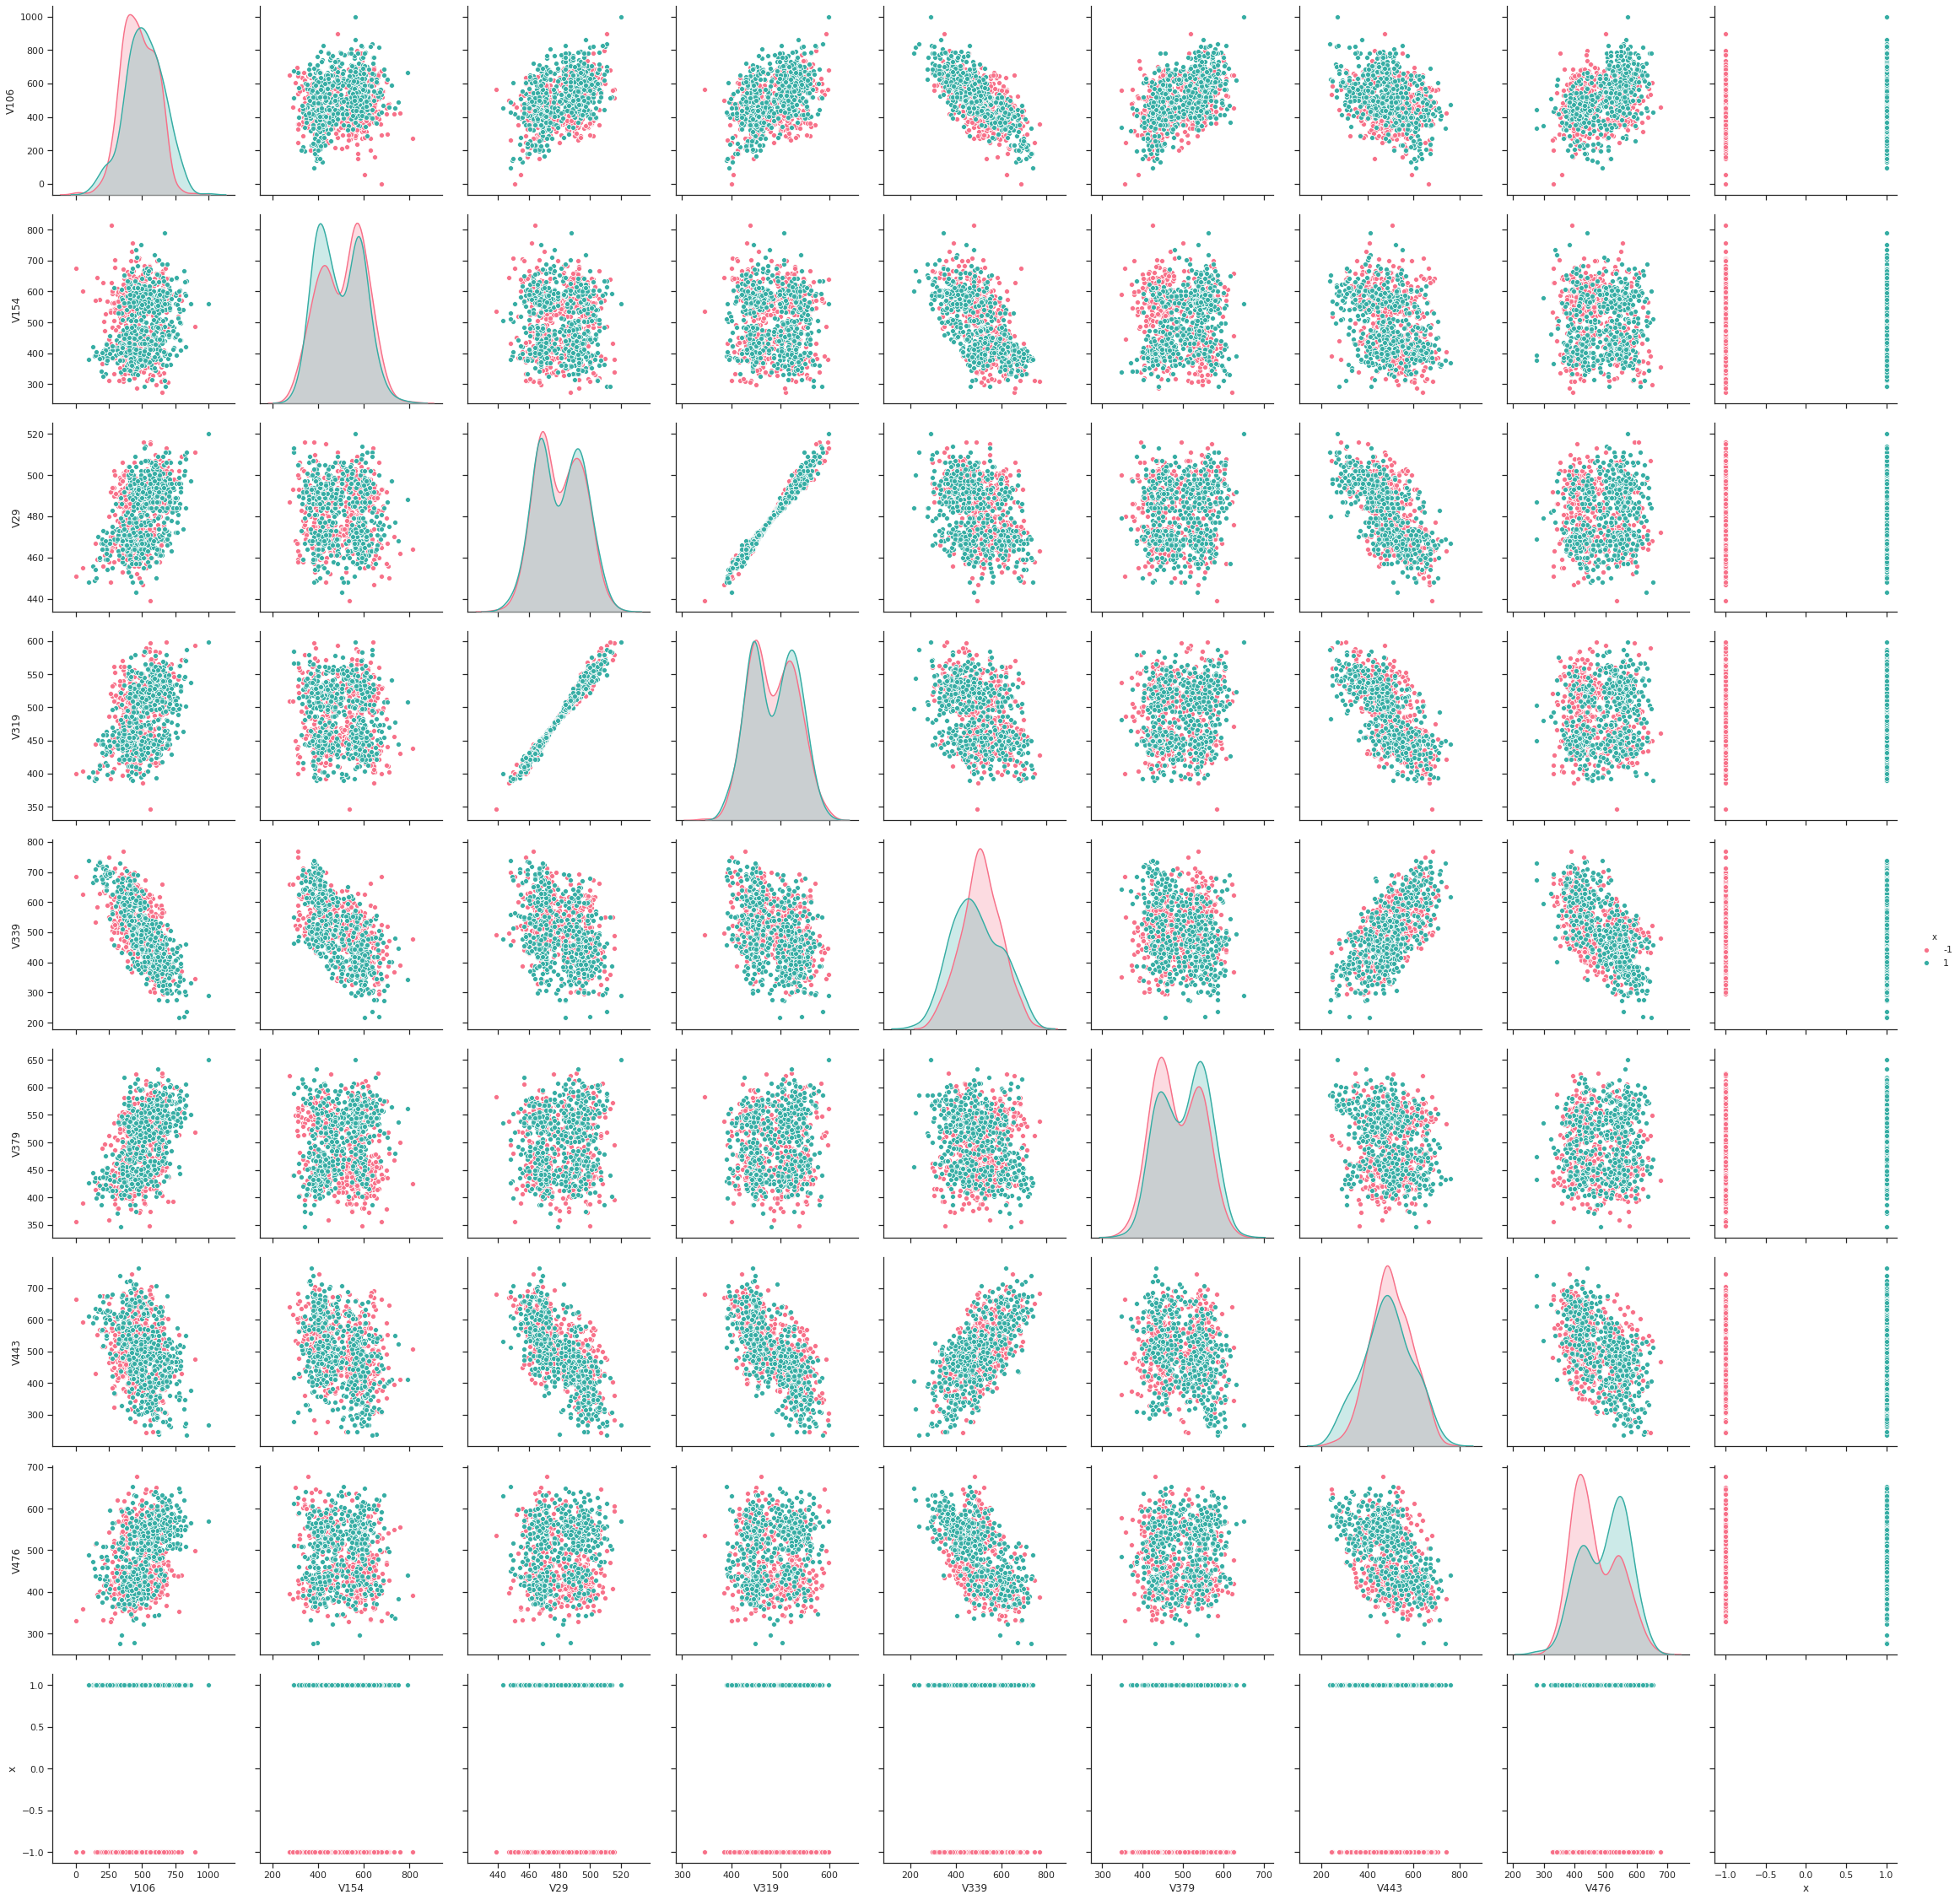

In [56]:
sns.set(style="ticks", color_codes=True)
Pairplot = pd.concat([X, y], axis=1)
g = sns.pairplot(Pairplot,  hue="x", height=3.5, palette="husl")
g

#### b. Corrélation

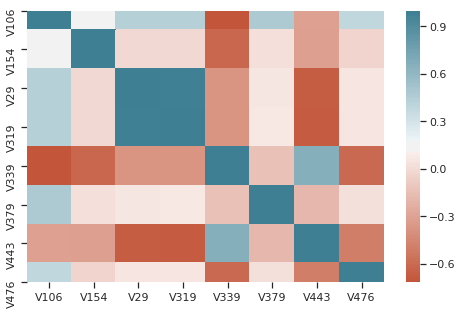

In [39]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(),cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

#### c. Boxplot

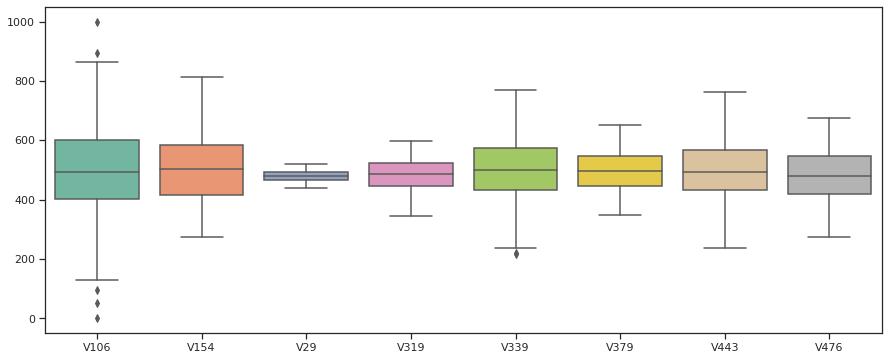

In [55]:
plt.subplots(figsize=(15, 6))
ax = sns.boxplot(data=X, orient="v", palette="Set2")

#### c. Normalité / Test de shapiro

In [41]:
for col in DT_Selected_features:
    stat, p = shapiro(X[col])
    print(col,":")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print("On ne rejette pas H0: la variable",col,"semble être Gaussien")
    else:
        print("On rejette H0: la variable",col,"ne semble pas être Gaussien")
    print("")

V106 :
Statistics=0.998, p=0.166
On ne rejette pas H0: la variable V106 semble être Gaussien

V154 :
Statistics=0.973, p=0.000
On rejette H0: la variable V154 ne semble pas être Gaussien

V29 :
Statistics=0.974, p=0.000
On rejette H0: la variable V29 ne semble pas être Gaussien

V319 :
Statistics=0.973, p=0.000
On rejette H0: la variable V319 ne semble pas être Gaussien

V339 :
Statistics=0.996, p=0.006
On rejette H0: la variable V339 ne semble pas être Gaussien

V379 :
Statistics=0.972, p=0.000
On rejette H0: la variable V379 ne semble pas être Gaussien

V443 :
Statistics=0.996, p=0.006
On rejette H0: la variable V443 ne semble pas être Gaussien

V476 :
Statistics=0.970, p=0.000
On rejette H0: la variable V476 ne semble pas être Gaussien



## 4. Modèles de prédiction

In [ ]:
parameters = {
    "eta" : np.arange(0.01, 0.35, 0.05),
    "lambda" : np.arange(1, 2, 0.25),
    "subsample" : np.arange(0.5, 1, 0.1),
    "colsample_bytree": np.arange(0.5, 1.1, 0.25),
    "learning_rate":  [0.001, 0.005, 0.01, 0.05, 0.1],
    "max_depth":np.arange(5, 11, dtype=int),
    "max_features":[0.5, 1.0],
    "n_estimators" : [200, 400, 500],
    "eval_metric" : ["error"], 
    'objective': ['binary:logistic']
    }

In [36]:
parameters = {
    "eta" : np.arange(0.005, 0.2, 0.05),
    "gamma" : np.arange(0.5, 1, 0.1),
    "alpha" : np.arange(0, 5, 2),
    "lambda" : np.arange(1, 2, 0.25),
    "subsample" : np.arange(0.5, 1, 0.1),
    "colsample_bytree": np.arange(0.7, 1, 0.1),
    "learning_rate":  np.arange(0.005, 0.12, 0.02),
    "max_depth":np.arange(5, 13, dtype=int),
    "max_features":[0.5, 1.0],
    "n_estimators" : [200, 400, 500],
    }